# Задачи к Лекции 2

__Исходные данные__ 

Дан файл **"mlbootcamp5_train.csv"**. В нем содержатся данные об опросе 70000 пациентов с целью определения наличия заболеваний сердечно-сосудистой системы (ССЗ). Данные в файле промаркированы и если у человека имееются ССЗ, то значение **cardio** будет равно 1, в противном случае - 0. Описание и значения полей представлены во второй лекции.

__Загрузка файла__

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("mlbootcamp5_train.csv", 
                 sep=";", 
                 index_col="id")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [16]:
from sklearn.naive_bayes import GaussianNB

data = df[(df["age"] > 12500)&
          (df["weight"] > 40)&(df["weight"] < 105)&
          (df["height"] > 140)&(df["height"] < 190)&
          (df["ap_lo"] > 60)&(df["ap_lo"] < 110)&
          (df["ap_hi"] > 80)&(df["ap_hi"] < 170)]
train = data[["age", "weight", "height", "ap_lo", "ap_hi"]]
target = data['cardio']

## Задачи

**1. Построить наивный байесовский классификатор для количественных полей age, height, weight, ap_hi, ap_lo. Исправить данные, если это необходимо. Привести матрицу неточностей и сравнить со значением полученным в ходе лекции. Попытаться объяснить разницу.**

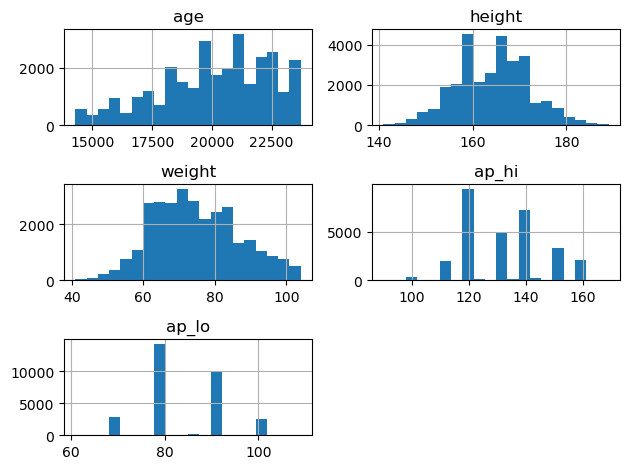

In [54]:
# Your code here
df[df["cardio"] == 1][["age", "height", "weight", "ap_hi", "ap_lo"]].hist(bins=20)
plt.tight_layout()

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

train = df[["age", "height", "weight", "ap_hi", "ap_lo"]]
target = df["cardio"]

model = gnb.fit(train, target)
predict = model.predict(train)
print(df.shape[0],
     (target == predict).sum() / df.shape[0])

predict

61646 0.705187684521299


array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [26]:
model.predict(train[1:2]), model.predict_proba(train[1:2])

(array([1], dtype=int64), array([[0.05515127, 0.94484873]]))

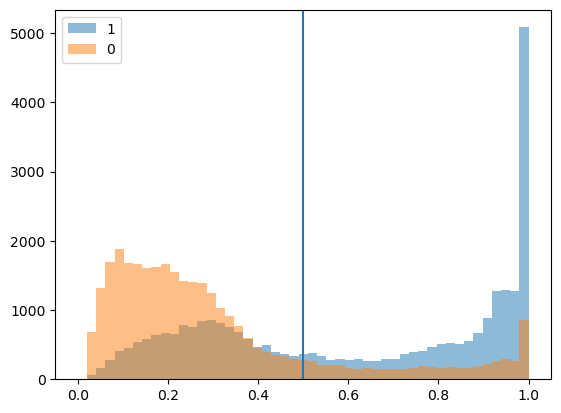

In [28]:
prob = model.predict_proba(train)[:,1]
plt.hist(prob[target == 1], bins=np.linspace(0, 1, 50), alpha=0.5, label="1");
plt.hist(prob[target == 0], bins=np.linspace(0, 1, 50), alpha=0.5, label="0");
plt.axvline(0.5)
plt.legend();

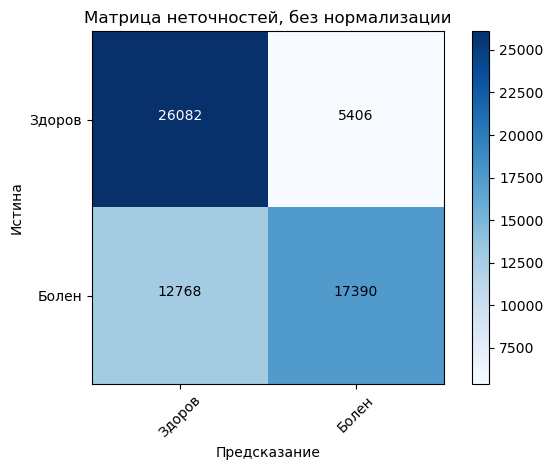

In [30]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(target, predict)

import itertools
class_names = ["Здоров", "Болен"]
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица неточностей', cmap=plt.cm.Blues):    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.4f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Матрица неточностей, без нормализации')
plt.show()

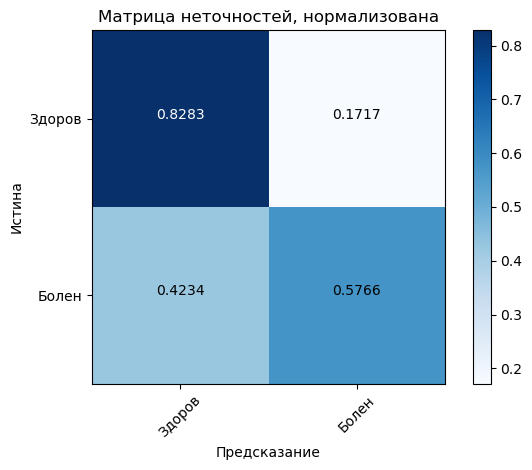

In [32]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()

**Комментарии:** Ваши комментарии здесь.

**2. Написать свой наивный байесовский классификатор для категориальных полей cholesterol, gluc. Привести матрицу неточностей и сравнить со значениями из задачи 1 (нельзя использовать готовое решение из sklearn) (не обязательно)**

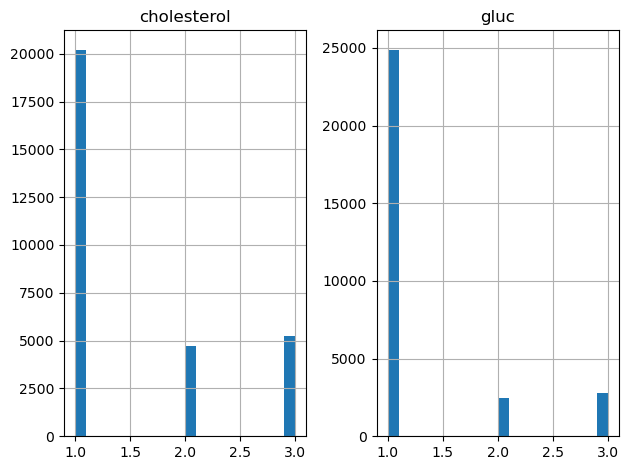

In [34]:
# Your code here
df[df["cardio"] == 1][["cholesterol", "gluc"]].hist(bins=20)
plt.tight_layout()

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

train = df[["cholesterol", "gluc"]]
target = df["cardio"]

model = gnb.fit(train, target)
predict = model.predict(train)
print(df.shape[0],
     (target == predict).sum() / df.shape[0])

predict

70000 0.5877142857142857


array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [26]:
model.predict(train[1:2]), model.predict_proba(train[1:2])

(array([1], dtype=int64), array([[0.03654675, 0.96345325]]))

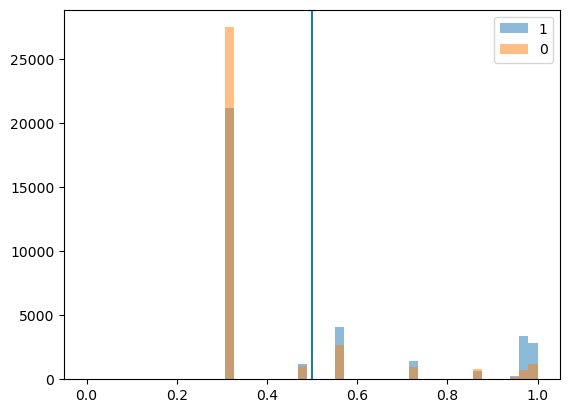

In [28]:
prob = model.predict_proba(train)[:,1]
plt.hist(prob[target == 1], bins=np.linspace(0, 1, 50), alpha=0.5, label="1");
plt.hist(prob[target == 0], bins=np.linspace(0, 1, 50), alpha=0.5, label="0");
plt.axvline(0.5)
plt.legend();

**Комментарии:** Ваши комментарии здесь.

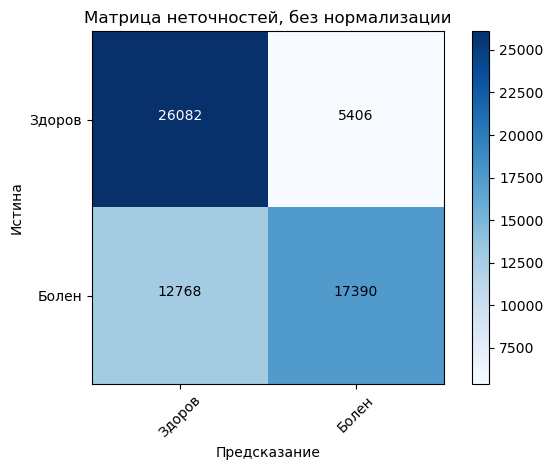

In [36]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(target, predict)

import itertools
class_names = ["Здоров", "Болен"]
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица неточностей', cmap=plt.cm.Blues):    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.4f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Матрица неточностей, без нормализации')
plt.show()

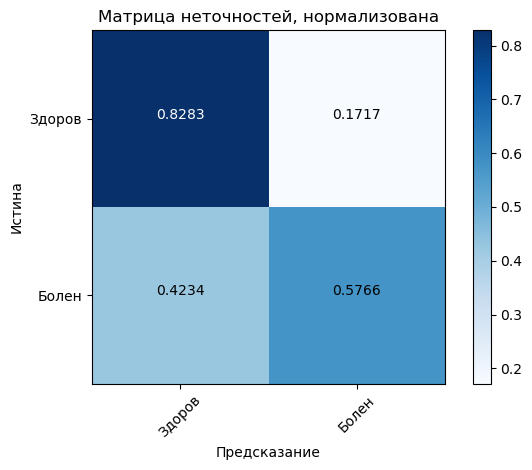

In [38]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()

3. Построить наивный байесовский классификатор для бинарных полей gender, smoke, alco, active. Привести матрицу неточностей и сравнить с предыдущими значениями.

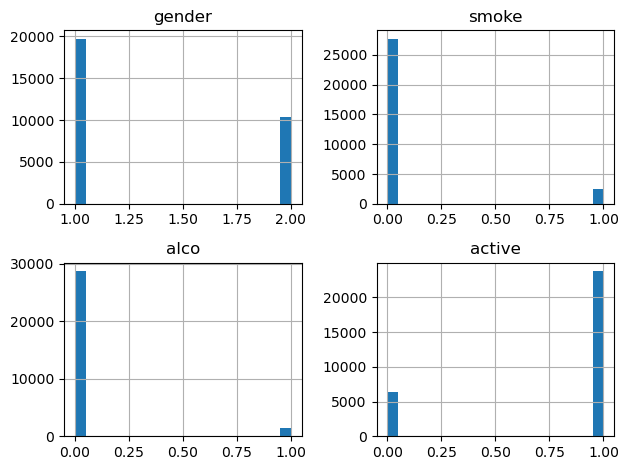

In [40]:
# Your code here
df[data["cardio"] == 1][["gender", "smoke", "alco", "active"]].hist(bins=20)
plt.tight_layout()

In [46]:
from sklearn.naive_bayes import BernoulliNB
gnb = BernoulliNB()

train = df[["gender", "smoke", "alco", "active"]]
target = df["cardio"]

model = gnb.fit(train, target)
predict = model.predict(train)
print(df.shape[0],
     (target == predict).sum() / df.shape[0])

predict

61646 0.520601498880706


array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [16]:
model.predict(train[1:2]), model.predict_proba(train[1:2])

(array([0], dtype=int64), array([[0.50582905, 0.49417095]]))

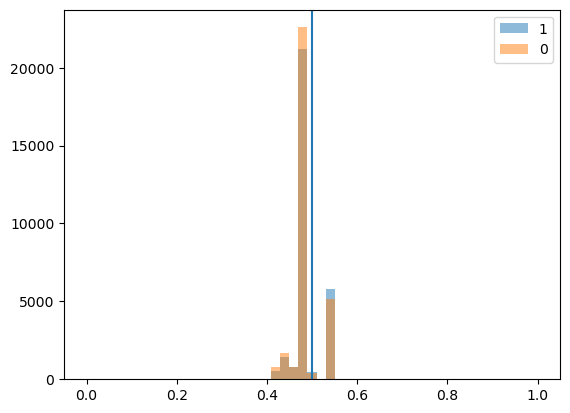

In [48]:
prob = model.predict_proba(train)[:,1]
plt.hist(prob[target == 1], bins=np.linspace(0, 1, 50), alpha=0.5, label="1");
plt.hist(prob[target == 0], bins=np.linspace(0, 1, 50), alpha=0.5, label="0");
plt.axvline(0.5)
plt.legend();

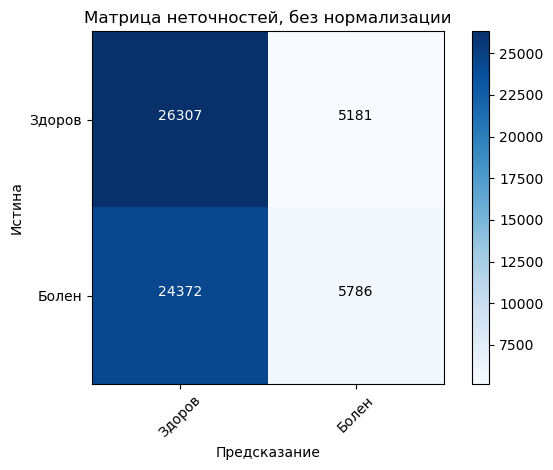

In [50]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(target, predict)

import itertools
class_names = ["Здоров", "Болен"]
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица неточностей', cmap=plt.cm.Blues):    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.4f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Матрица неточностей, без нормализации')
plt.show()

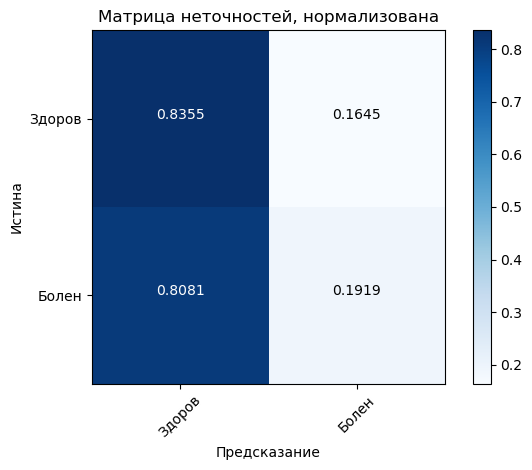

In [52]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()

**Комментарии:** Ваши комментарии здесь.

**4. К этому моменту у вас есть три независимых классификатора: по количественным полям, категориальным и бинарным. Придумать, как их объединить в один единый классификатор, который учитывает все эти поля. Привести матрицу неточностей для него и сравнить с предыдущими значениями. Попытаться объяснить разницу.**

In [50]:
# A lot of code here

**Комментарии:** Ваши комментарии здесь.

**5. (Не обязательно) Теперь мы умеем делать классификацию в рамках наивного предположения об независимости всех признаков. Сейчас же нужно попробовать учесть взаимосвязь между признаками через условные вероятности. Построить классификатор с учетом такой связи. Сравнить результат с ранее полученными значениями.**

In [54]:
# A lot of code here

**Комментарии:** Ваши комментарии здесь.